In [30]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score

In [31]:
df=pd.read_csv("heart (1).csv")

In [32]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [33]:
df.shape

(918, 12)

In [34]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [35]:
df1 = df[df.Cholesterol<=(df.Cholesterol.mean()+3*df.Cholesterol.std())] 
df2=df1[df1.RestingBP<=(df1.RestingBP.mean()+3*df1.RestingBP.std())] 
df3=df2[df2.FastingBS<=(df2.FastingBS.mean()+3*df2.FastingBS.std())] 
df4=df3[df3.MaxHR<=(df3.MaxHR.mean()+3*df3.MaxHR.std())] 
df5=df4[df4.Oldpeak<=(df4.Oldpeak.mean()+3*df4.Oldpeak.std())]

In [36]:
df=df5

In [37]:
df.Sex.unique()

array(['M', 'F'], dtype=object)

In [38]:
df.replace('M', 0, inplace=True) 
df.replace('F', 1, inplace=True)

In [39]:
dummies = pd.get_dummies(df['ChestPainType']).astype(int) 
merged=pd.concat([df,dummies],axis='columns') 
merged.drop("ChestPainType",axis=1,inplace=True) 
merged.drop("ASY",axis=1,inplace=True) 
df=merged

In [40]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ATA,NAP,TA
0,40,0,140,289,0,Normal,172,N,0.0,Up,0,1,0,0
1,49,1,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0
2,37,0,130,283,0,ST,98,N,0.0,Up,0,1,0,0
3,48,1,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,0
4,54,0,150,195,0,Normal,122,N,0.0,Up,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,Normal,132,N,1.2,Flat,1,0,0,1
914,68,0,144,193,1,Normal,141,N,3.4,Flat,1,0,0,0
915,57,0,130,131,0,Normal,115,Y,1.2,Flat,1,0,0,0
916,57,1,130,236,0,LVH,174,N,0.0,Flat,1,1,0,0


In [41]:
df.rename(columns={'ATA': 'ChestPainType_ATA'}, inplace=True) 
df.rename(columns={'NAP': 'ChestPainType_NAP'}, inplace=True) 
df.rename(columns={'TA': 'ChestPainType_TA'}, inplace=True)
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,0,140,289,0,Normal,172,N,0.0,Up,0,1,0,0
1,49,1,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0
2,37,0,130,283,0,ST,98,N,0.0,Up,0,1,0,0
3,48,1,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,0
4,54,0,150,195,0,Normal,122,N,0.0,Up,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,Normal,132,N,1.2,Flat,1,0,0,1
914,68,0,144,193,1,Normal,141,N,3.4,Flat,1,0,0,0
915,57,0,130,131,0,Normal,115,Y,1.2,Flat,1,0,0,0
916,57,1,130,236,0,LVH,174,N,0.0,Flat,1,1,0,0


In [42]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [43]:
dummies = pd.get_dummies(df['RestingECG']).astype(int) 
merged=pd.concat([df,dummies],axis='columns') 
merged.drop("RestingECG",axis=1,inplace=True) 
merged.drop("LVH",axis=1,inplace=True) 
df=merged

In [44]:
df.rename(columns={'Normal': 'RestingECG_Normal'}, inplace=True) 
df.rename(columns={'ST': 'RestingECG_ST'}, inplace=True)

In [45]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,40,0,140,289,0,172,N,0.0,Up,0,1,0,0,1,0
1,49,1,160,180,0,156,N,1.0,Flat,1,0,1,0,1,0
2,37,0,130,283,0,98,N,0.0,Up,0,1,0,0,0,1
3,48,1,138,214,0,108,Y,1.5,Flat,1,0,0,0,1,0
4,54,0,150,195,0,122,N,0.0,Up,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,132,N,1.2,Flat,1,0,0,1,1,0
914,68,0,144,193,1,141,N,3.4,Flat,1,0,0,0,1,0
915,57,0,130,131,0,115,Y,1.2,Flat,1,0,0,0,1,0
916,57,1,130,236,0,174,N,0.0,Flat,1,1,0,0,0,0


In [46]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [47]:
dummies = pd.get_dummies(df['ST_Slope']).astype(int) 
merged=pd.concat([df,dummies],axis='columns') 
merged.drop("ST_Slope",axis=1,inplace=True) 
merged.drop("Down",axis=1,inplace=True) 
df=merged

In [48]:
df.rename(columns={"UP": 'ST_Slope_up'}, inplace=True) 
df.rename(columns={"Flat": 'ST_Slope_Flat'}, inplace=True)

In [49]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,Up
0,40,0,140,289,0,172,N,0.0,0,1,0,0,1,0,0,1
1,49,1,160,180,0,156,N,1.0,1,0,1,0,1,0,1,0
2,37,0,130,283,0,98,N,0.0,0,1,0,0,0,1,0,1
3,48,1,138,214,0,108,Y,1.5,1,0,0,0,1,0,1,0
4,54,0,150,195,0,122,N,0.0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,132,N,1.2,1,0,0,1,1,0,1,0
914,68,0,144,193,1,141,N,3.4,1,0,0,0,1,0,1,0
915,57,0,130,131,0,115,Y,1.2,1,0,0,0,1,0,1,0
916,57,1,130,236,0,174,N,0.0,1,1,0,0,0,0,1,0


In [51]:
df.ExerciseAngina.unique()

array([0, 1], dtype=int64)

In [52]:
df.replace('N', 0, inplace=True) 
df.replace('Y', 1, inplace=True)
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,Up
0,40,0,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1
1,49,1,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,0,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,1,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,0,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,132,0,1.2,1,0,0,1,1,0,1,0
914,68,0,144,193,1,141,0,3.4,1,0,0,0,1,0,1,0
915,57,0,130,131,0,115,1,1.2,1,0,0,0,1,0,1,0
916,57,1,130,236,0,174,0,0.0,1,1,0,0,0,0,1,0


In [55]:
x = df.drop('HeartDisease',axis='columns') 
y = df['HeartDisease']

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
x_scaled = scaler.fit_transform(x) 
x_scaled

array([[-1.42896269, -0.51485643,  0.46089071, ..., -0.49062742,
        -1.00221976,  1.13805334],
       [-0.47545956,  1.94228905,  1.5925728 , ..., -0.49062742,
         0.99778516, -0.87869344],
       [-1.74679706, -0.51485643, -0.10495034, ...,  2.03820649,
        -1.00221976,  1.13805334],
       ...,
       [ 0.37209878, -0.51485643, -0.10495034, ..., -0.49062742,
         0.99778516, -0.87869344],
       [ 0.37209878,  1.94228905, -0.10495034, ..., -0.49062742,
         0.99778516, -0.87869344],
       [-1.64085227, -0.51485643,  0.3477225 , ..., -0.49062742,
        -1.00221976,  1.13805334]])

# Train using Bagging

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier( 
    base_estimator=DecisionTreeClassifier(), n_estimators=10, 
    max_samples=0.8,
    oob_score=True,
    random_state=10 
)
scores = cross_val_score(bag_model, x, y, cv=4) 
scores.mean()

0.8092084562438544

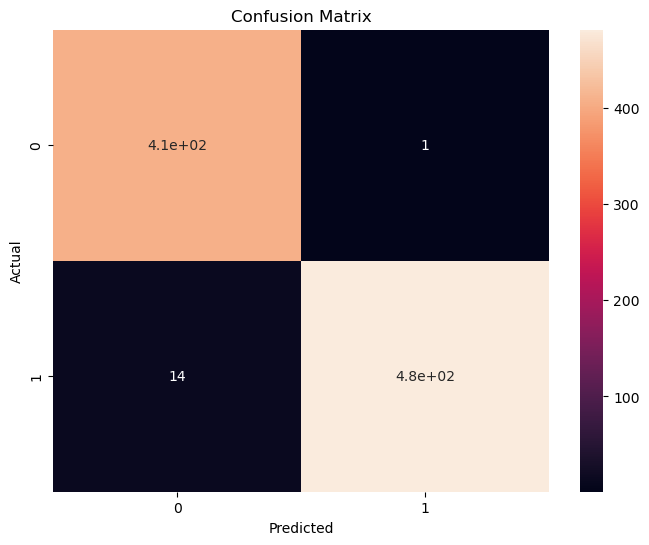

In [77]:
y_pred = bag_model.predict(x)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y, y_pred)
import seaborn as sn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()